Universidad del Valle de Guatemala <br>
25/04/2022 <br>
Minería de Datos # 20 

# Hoja de Trabajo 7
## SVM

**Integrantes:**<br>
Walter Saldaña 19897 <br>
José Gutierrez 19111 <br>
Javier Cotto 19324 <br>

### Importar modulos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import pylab
import random
import math
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from scipy import stats
from sklearn.metrics import confusion_matrix as Confusion_Matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn import svm
import time

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Carga de datos

In [6]:
entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
prueba = pd.read_csv('test.csv', encoding='unicode_escape')

### Preprocesamiento

Remover variables cualitativas que no aportan, ya que no son categóricas, y sus frecuencias no pueden ser clasificadas.

In [7]:
entrenamiento = entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)

Eliminar filas que contengan datos nulos (NaN).

In [8]:
entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)

Normalizacion

In [9]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in entrenamiento.columns:
    entrenamiento[col] = normalizer(entrenamiento[col])

Eliminacion de datos atipicos

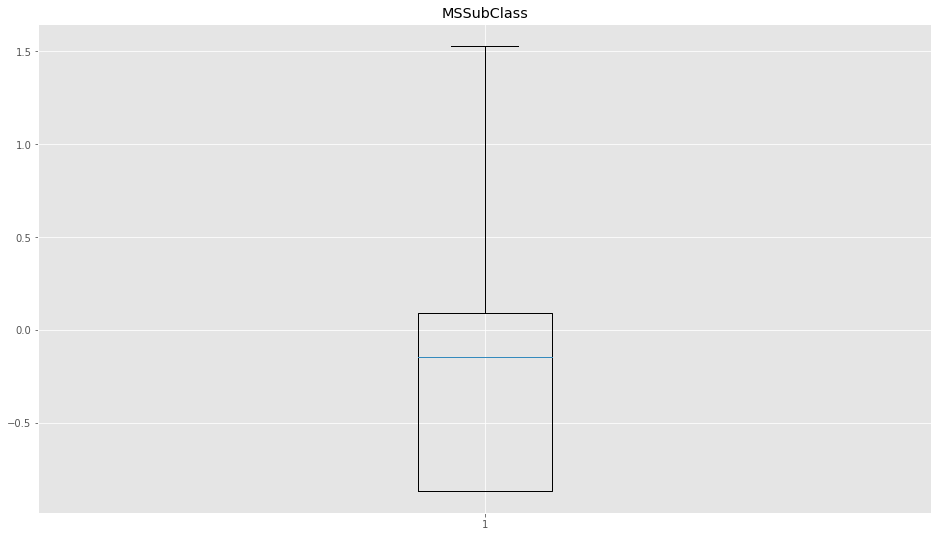

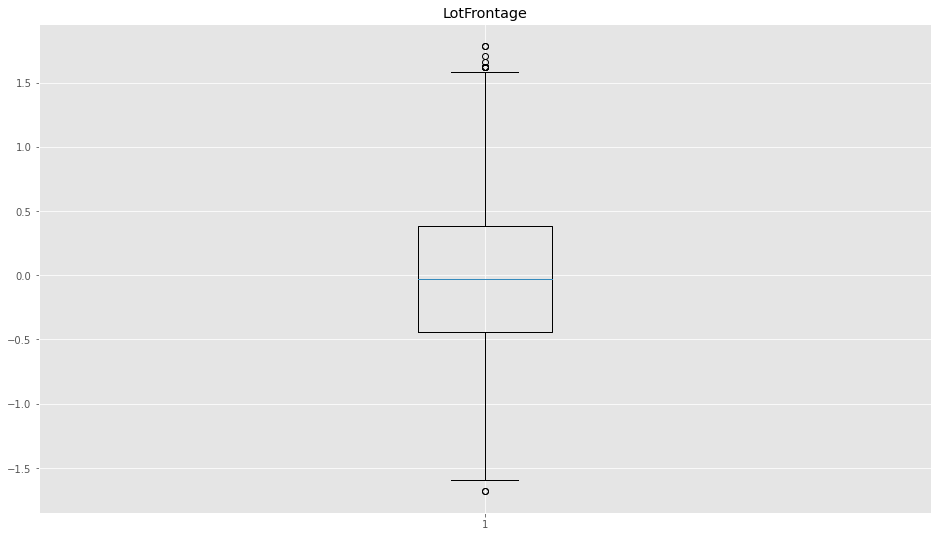

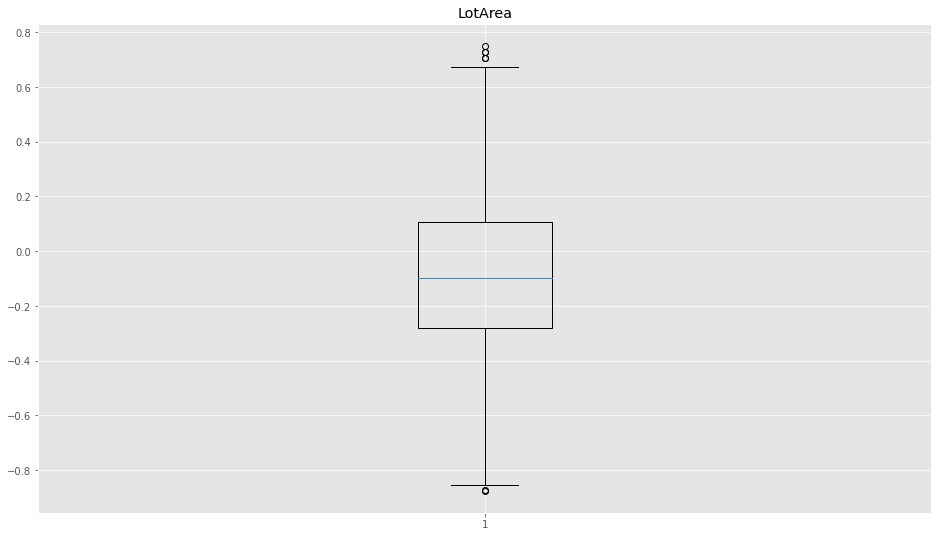

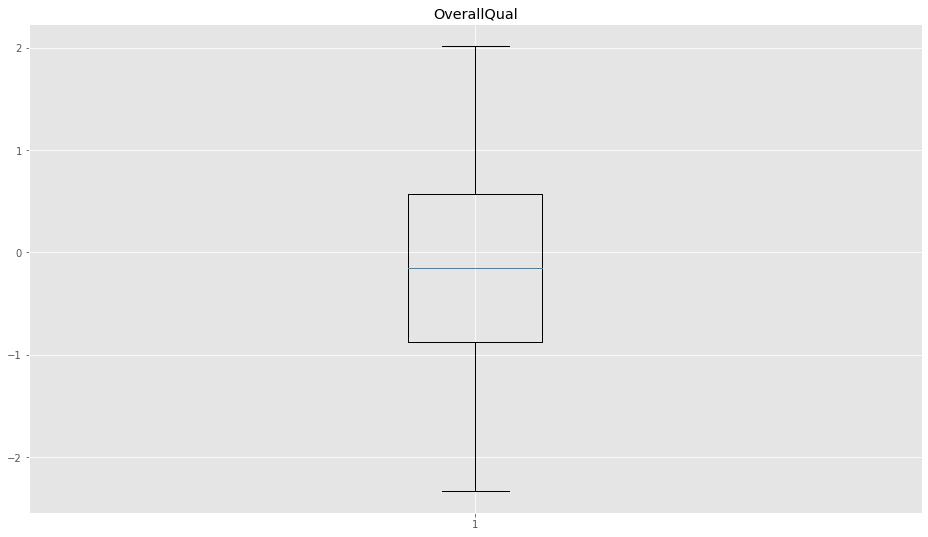

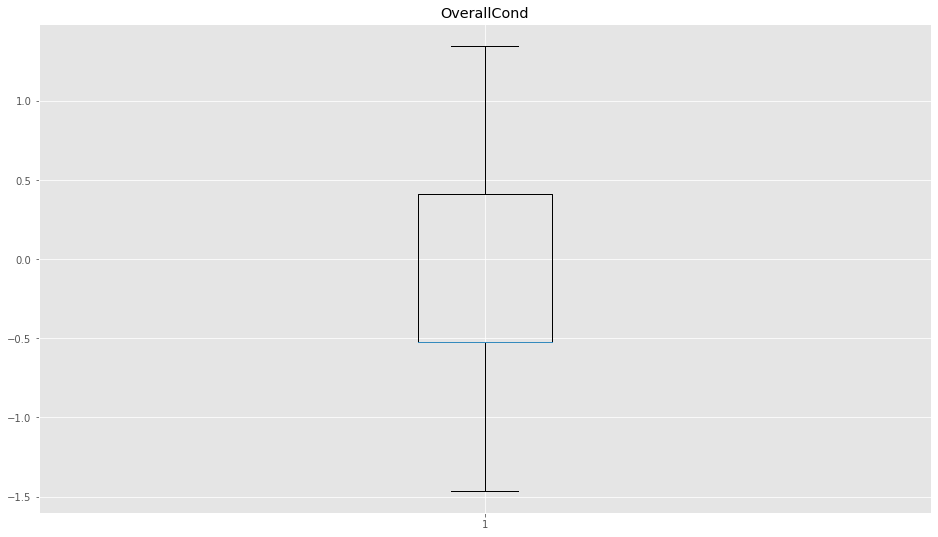

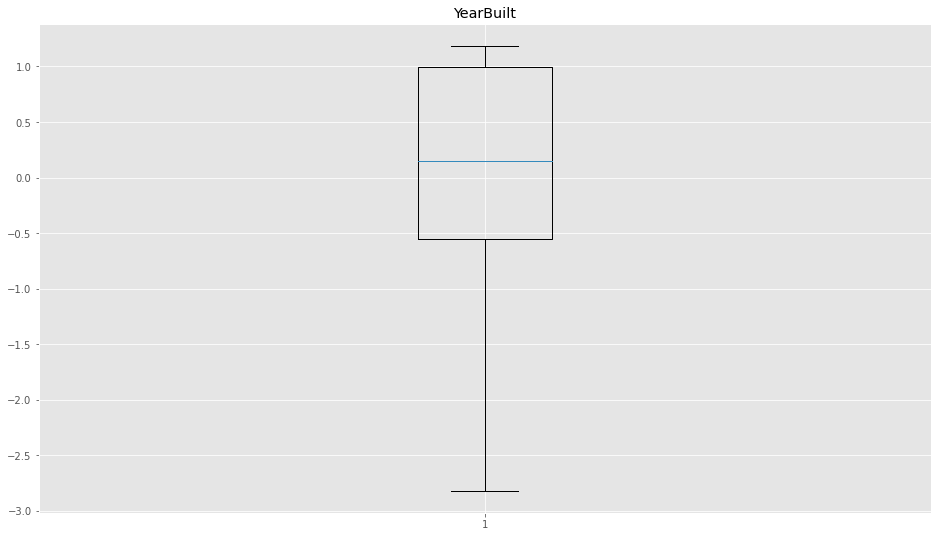

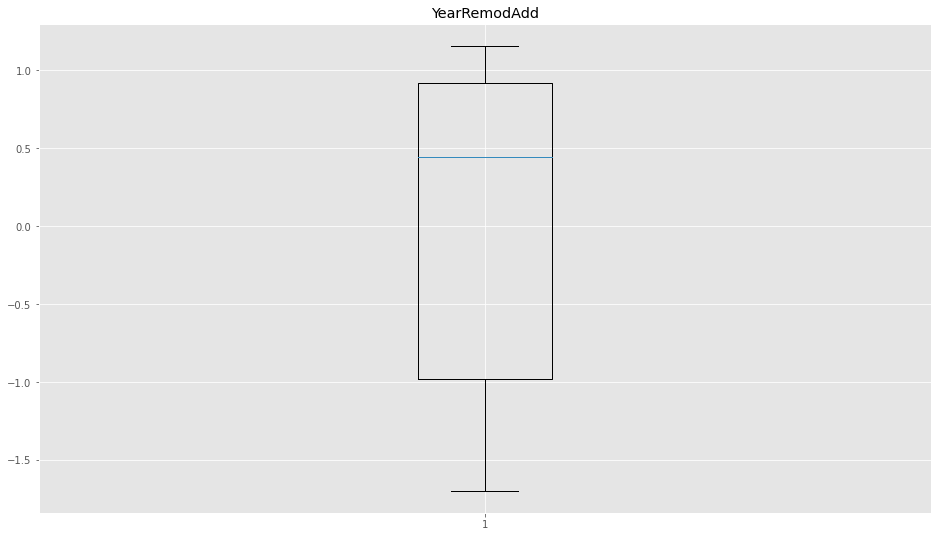

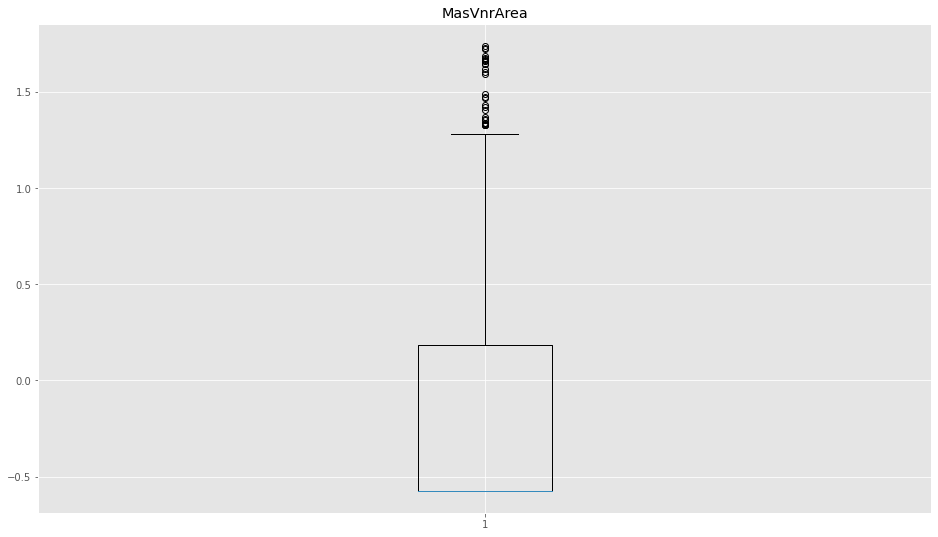

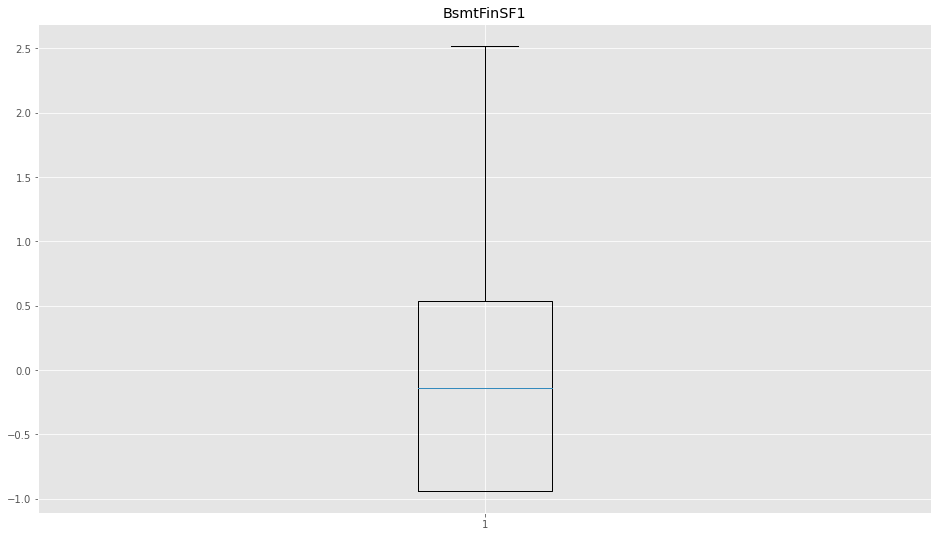

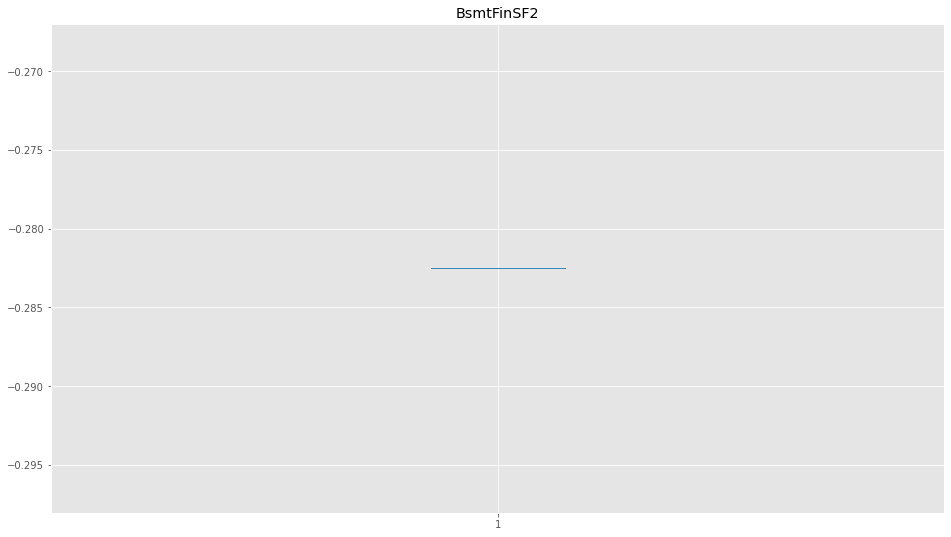

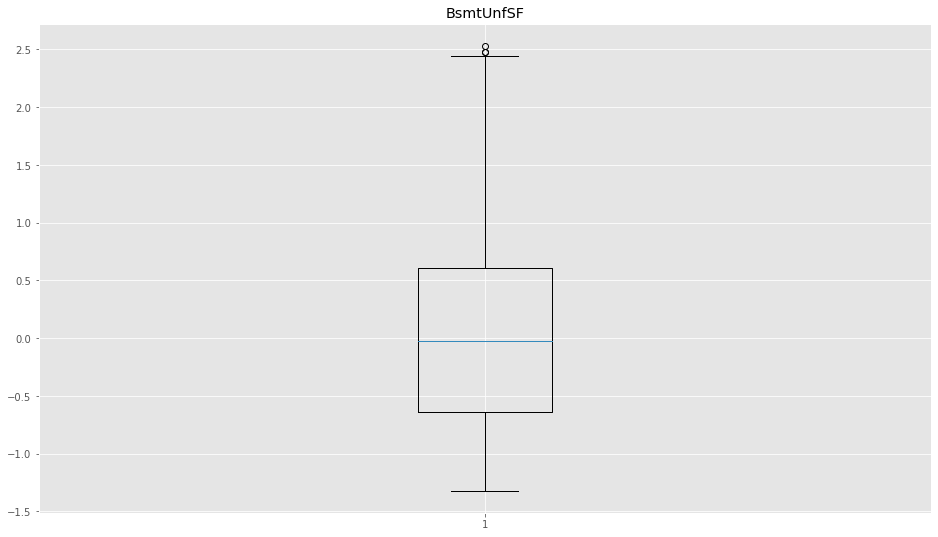

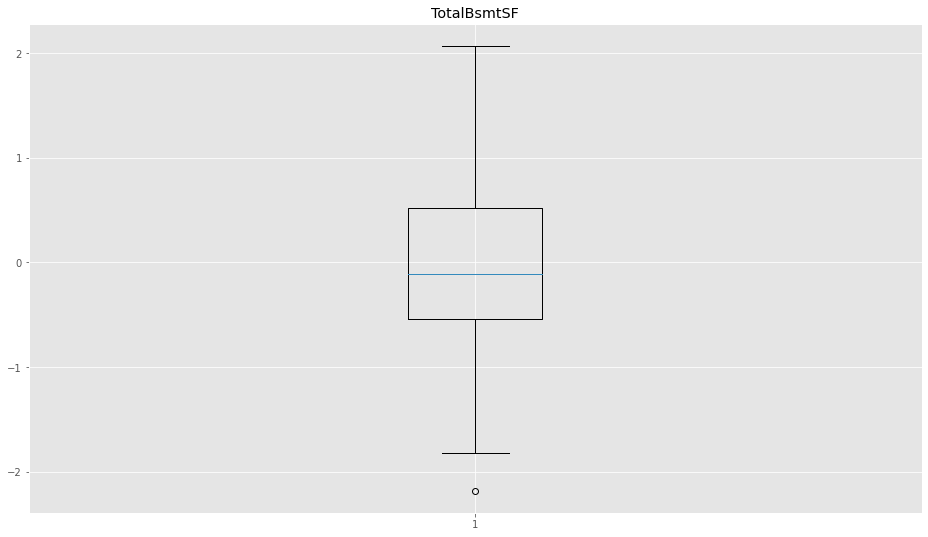

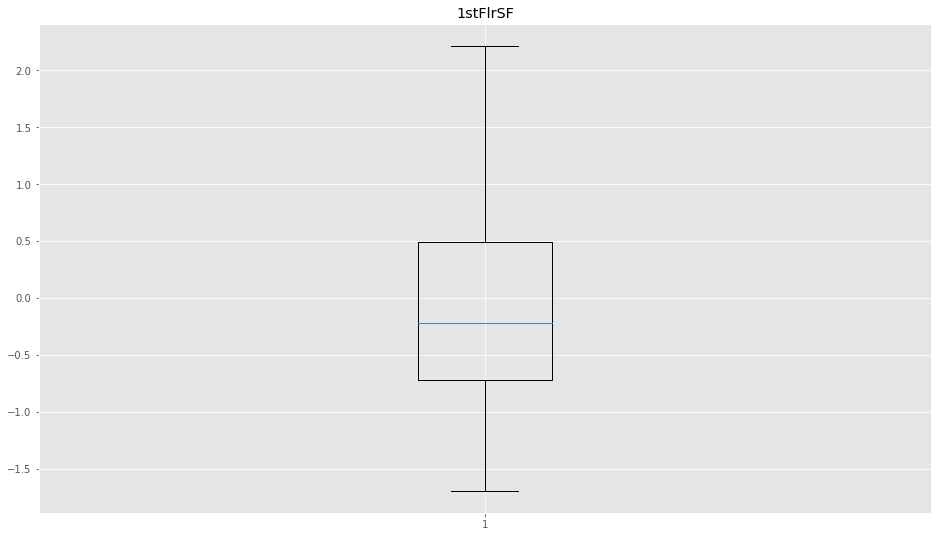

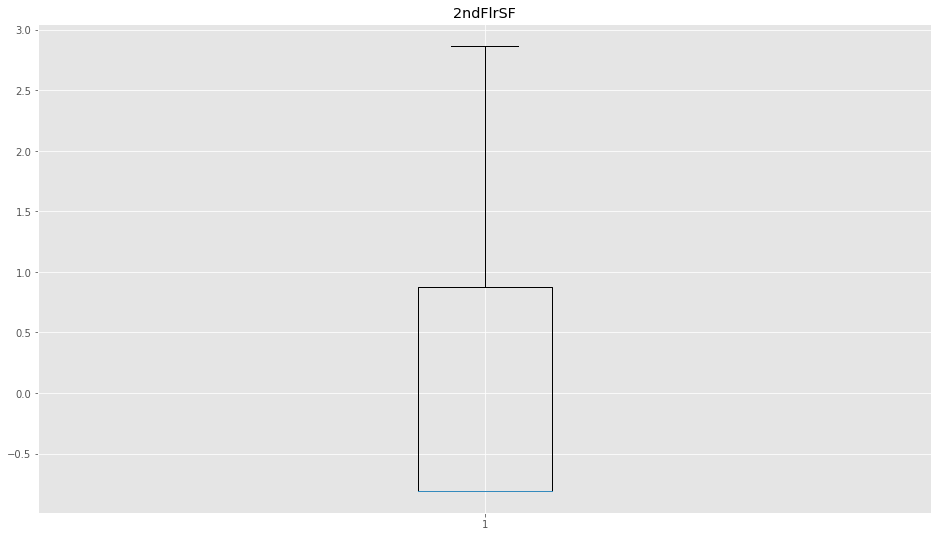

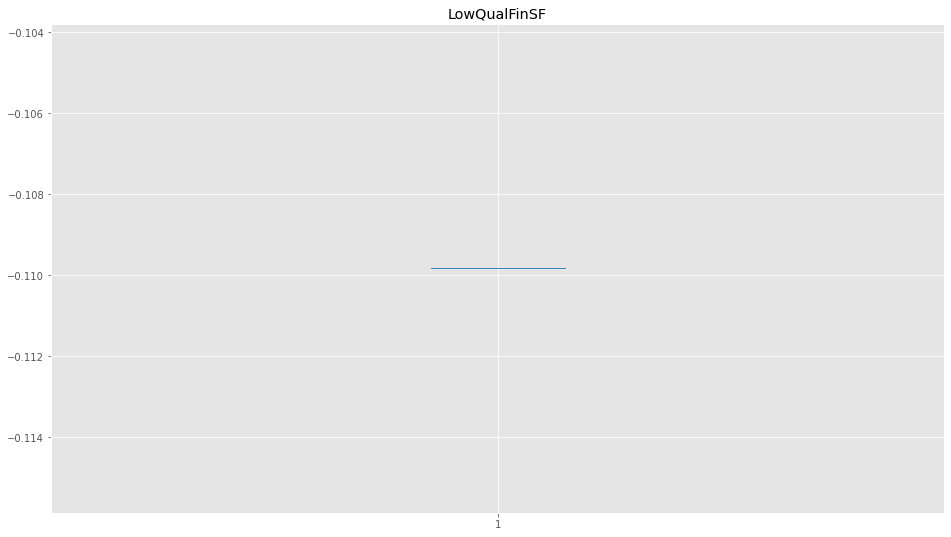

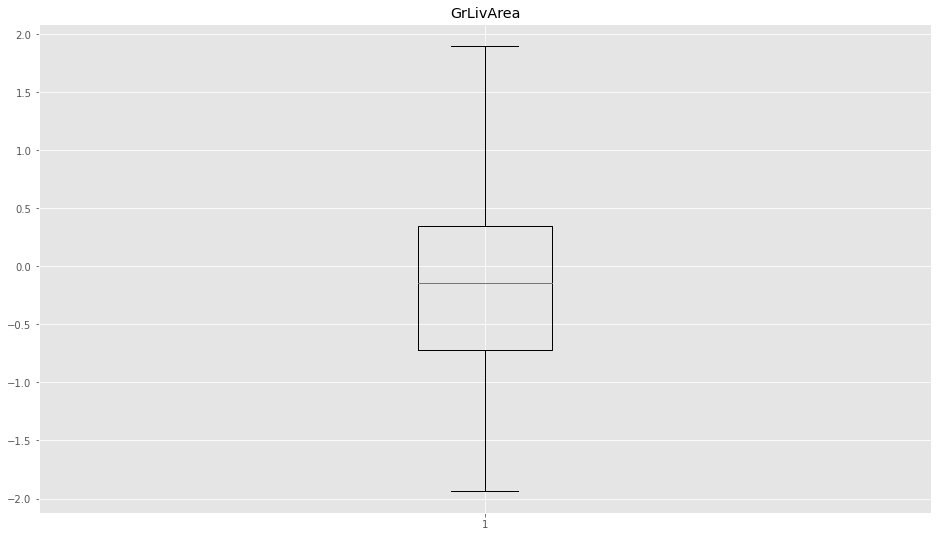

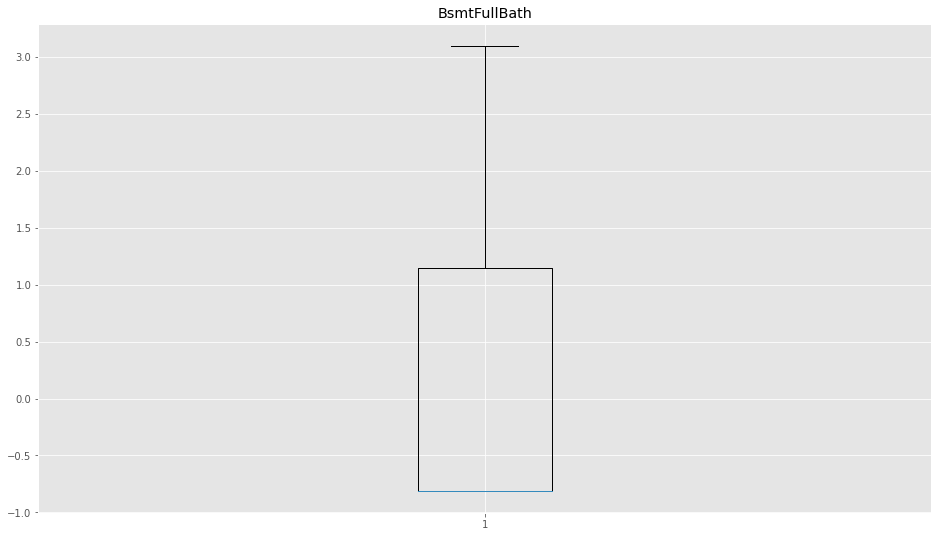

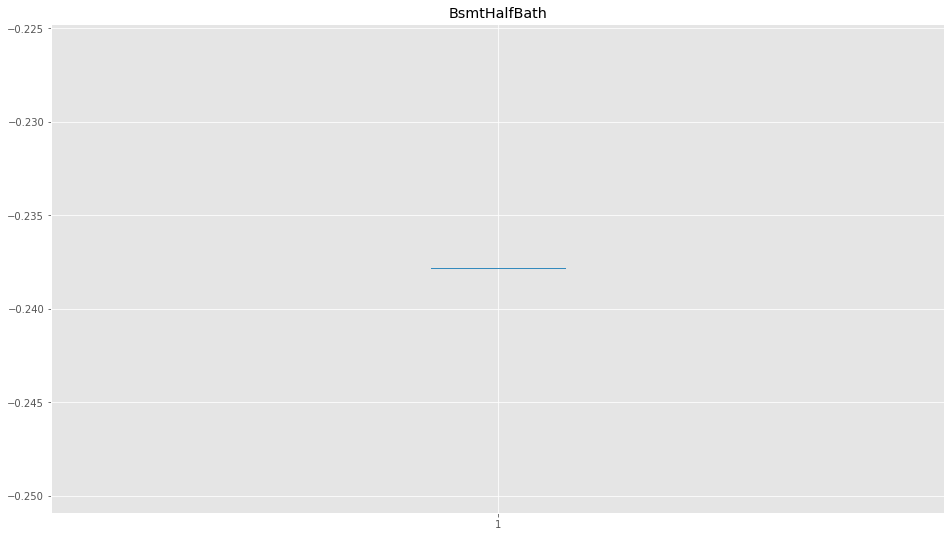

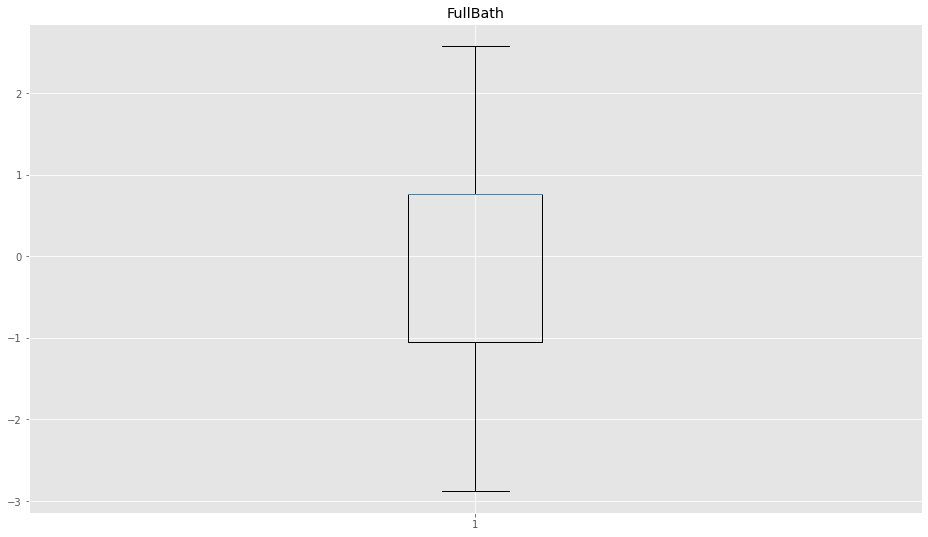

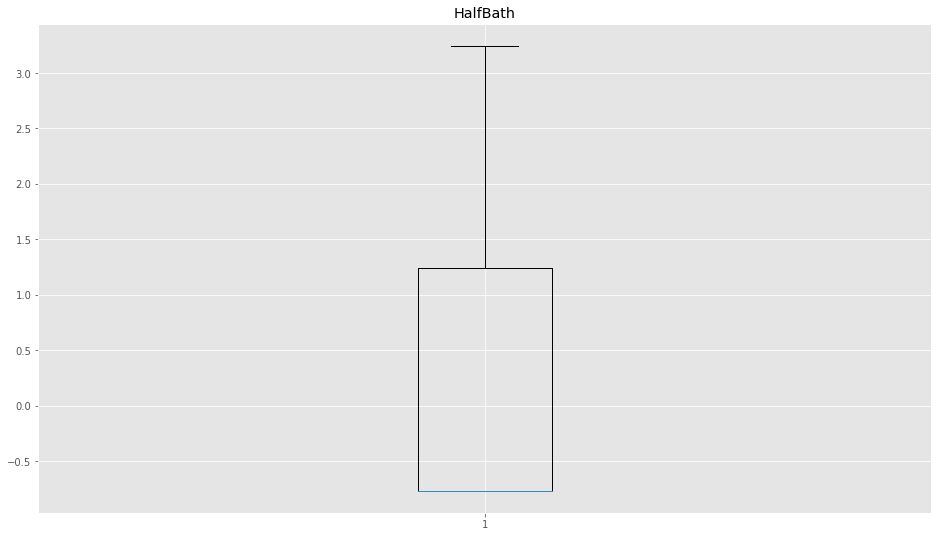

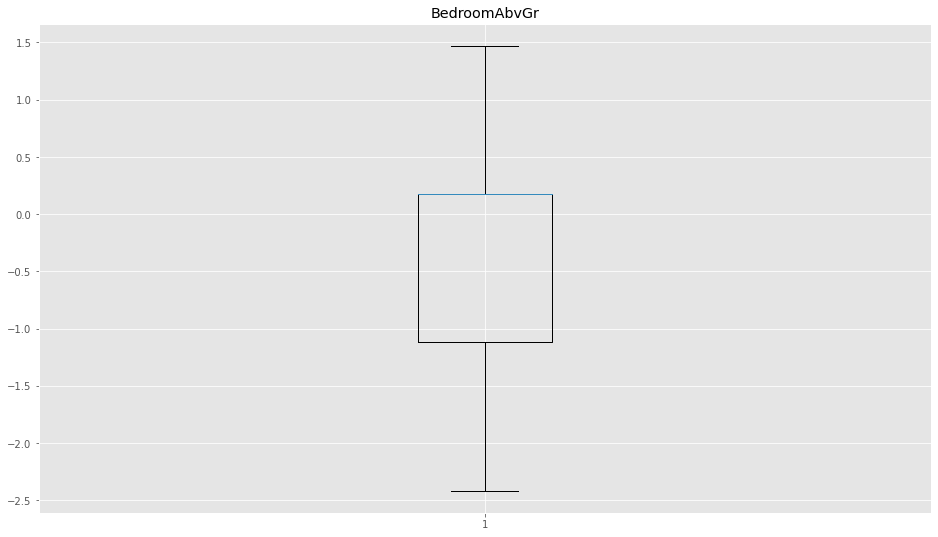

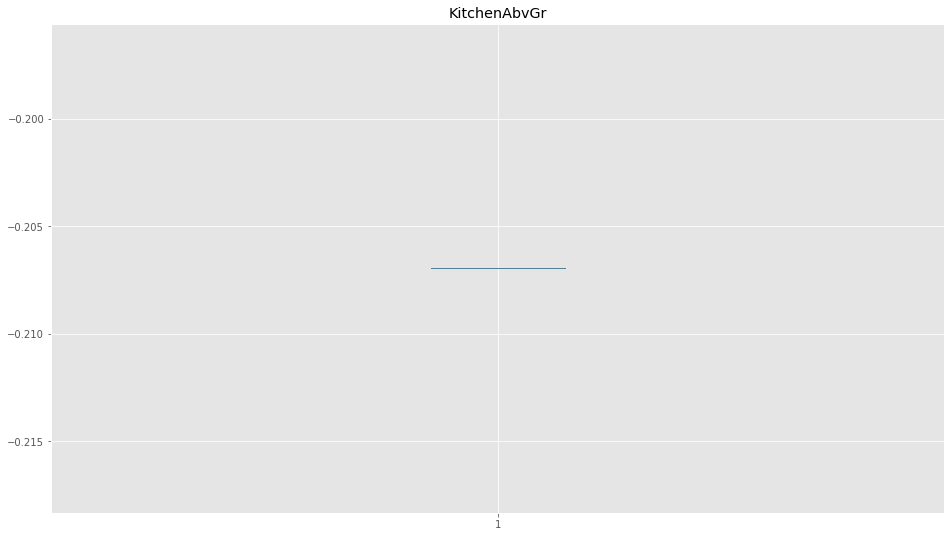

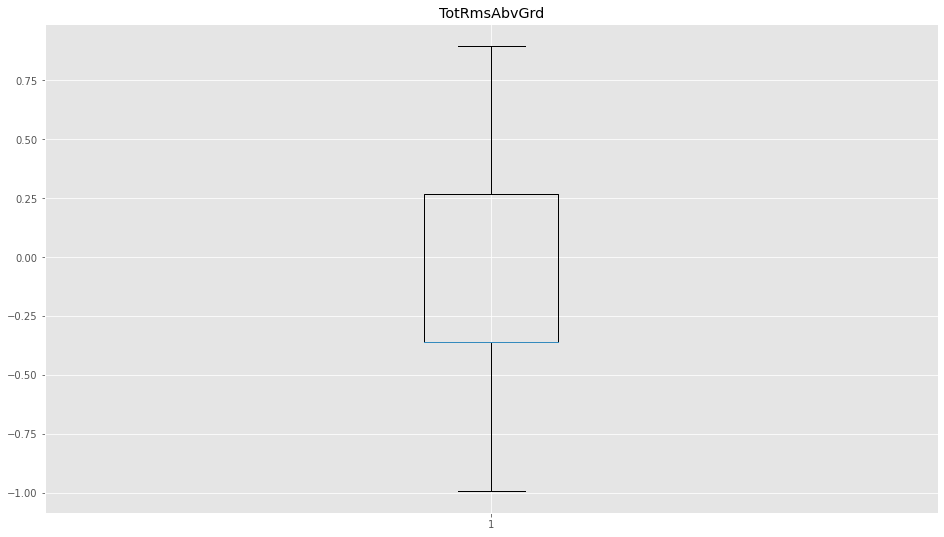

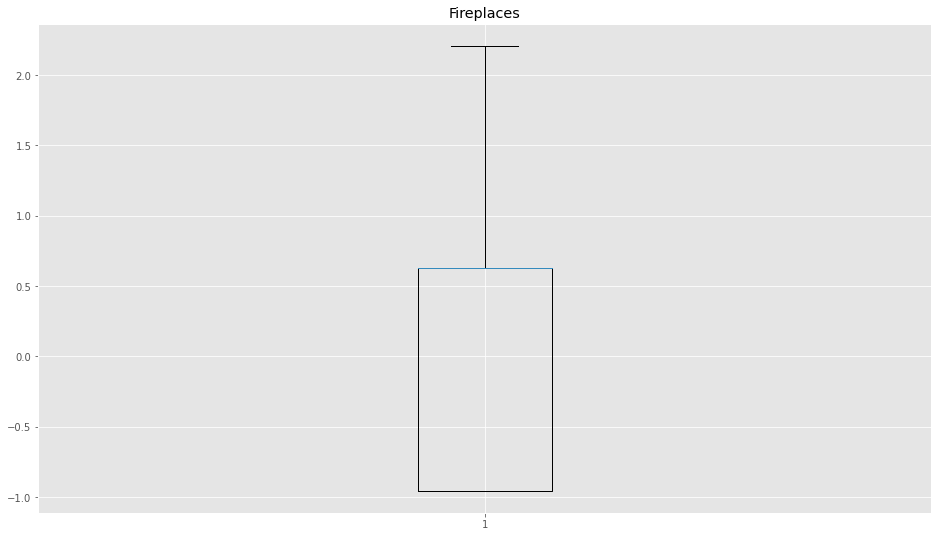

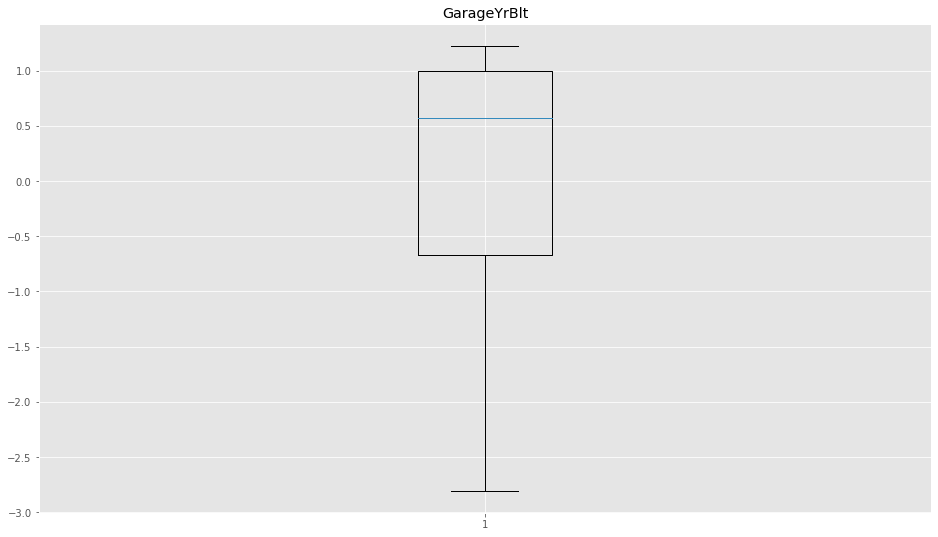

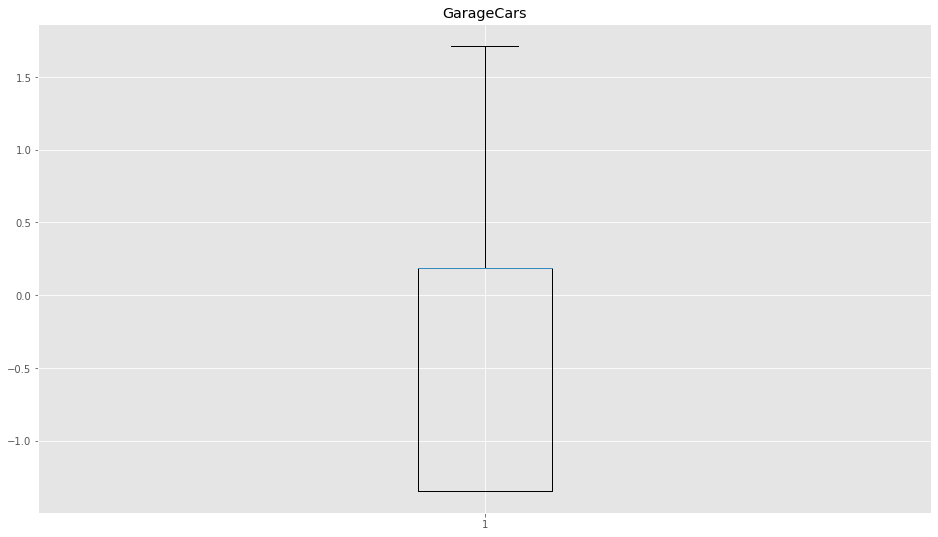

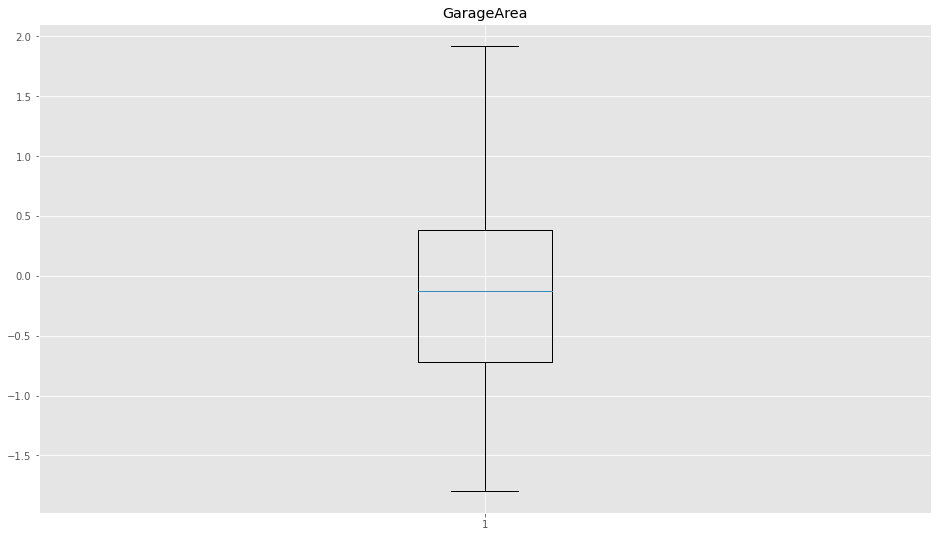

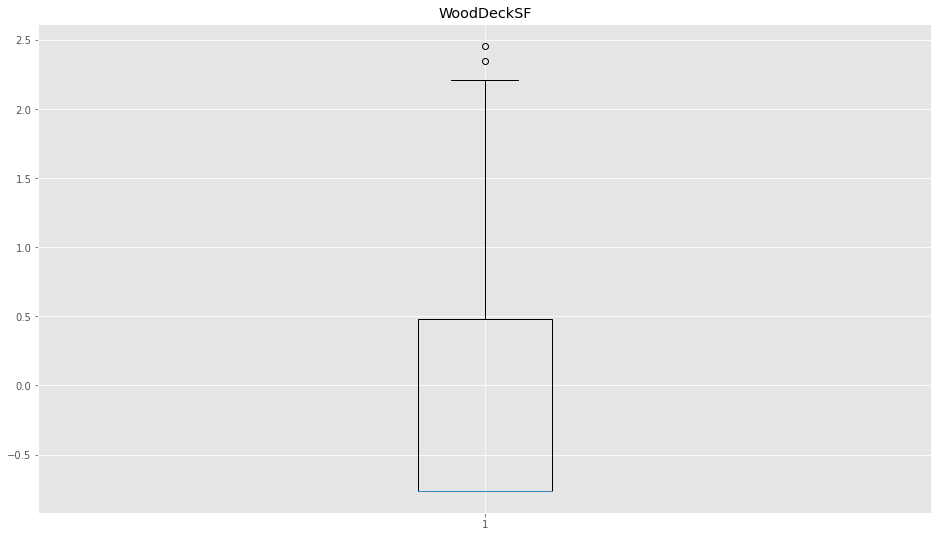

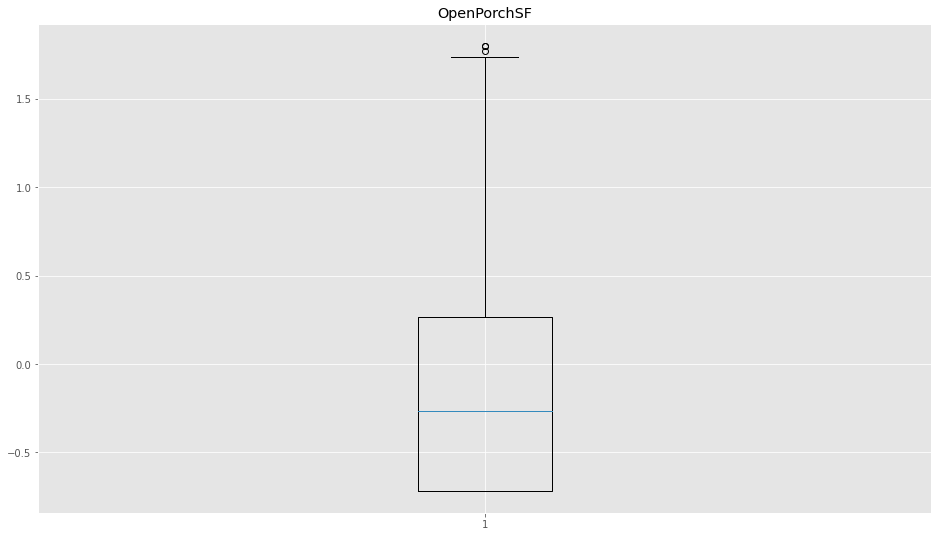

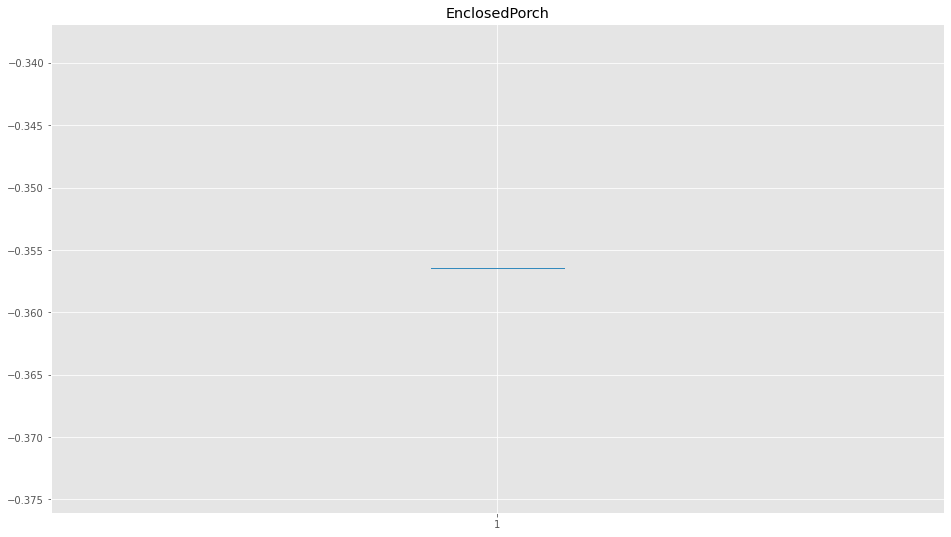

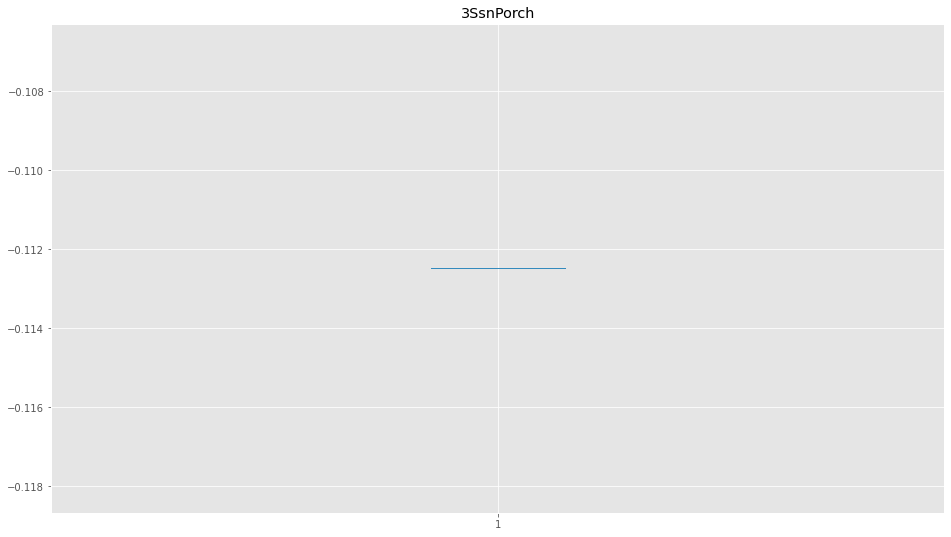

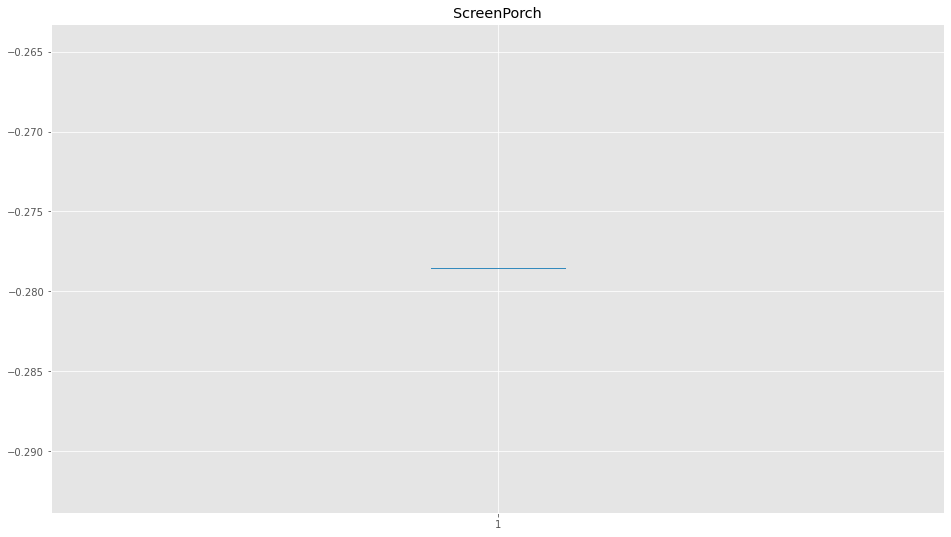

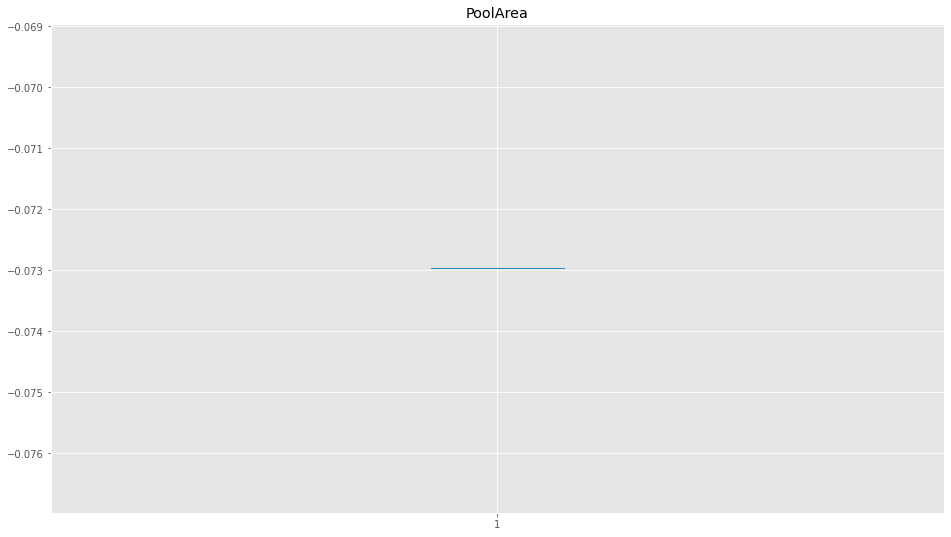

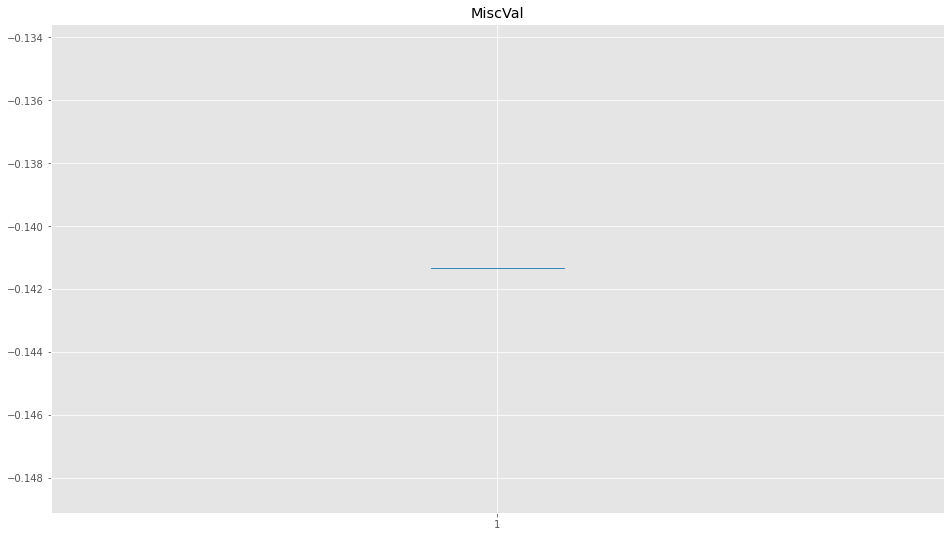

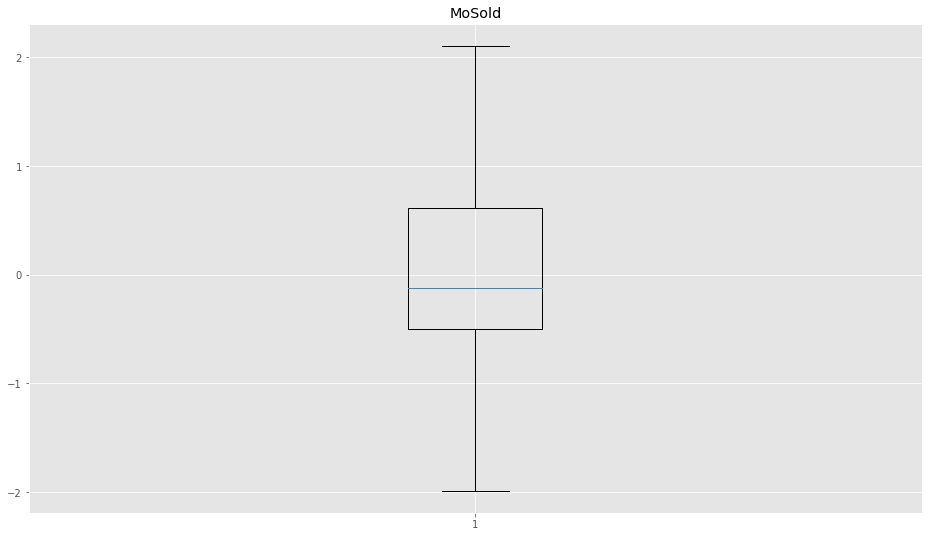

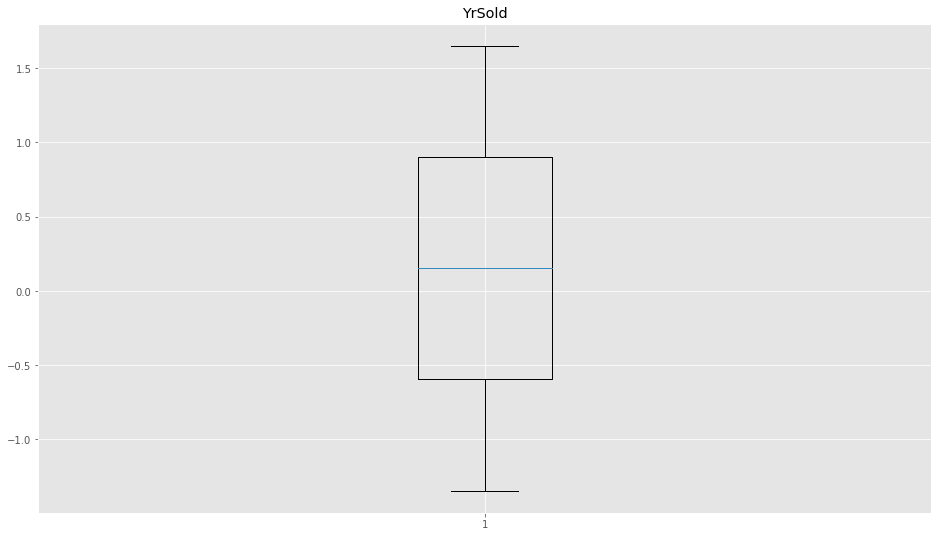

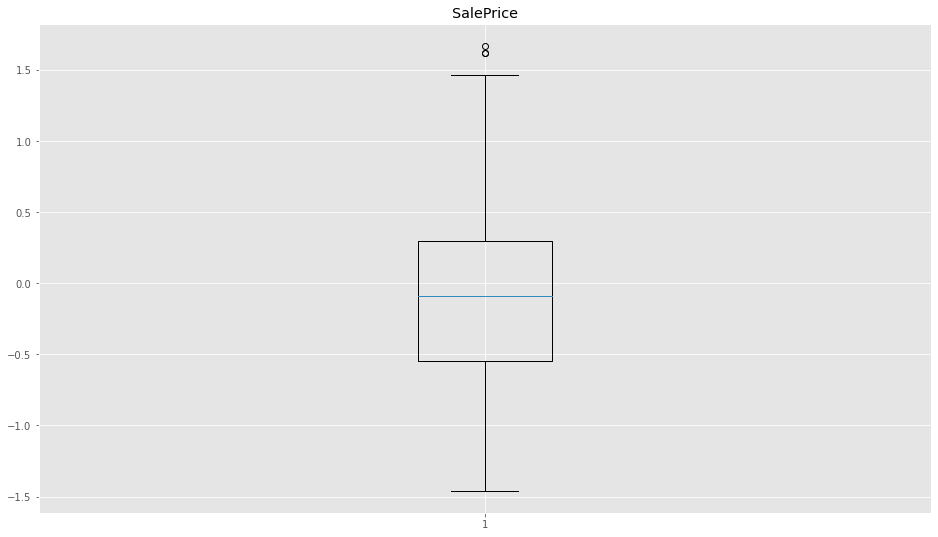

In [10]:
columns = []
for col in entrenamiento.columns:
    columns.append(col)
    
for columna in columns:
    Q1 = entrenamiento[columna].quantile(0.25)
    Q3 = entrenamiento[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = entrenamiento[entrenamiento[columna] < (Q1 - 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)

    indexes = entrenamiento[entrenamiento[columna] > (Q3 + 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)
    
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### 3) Creacion de la variable categórica que especifica si la casa es barata, media o cara

In [11]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(entrenamiento[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
entrenamiento['KmeansCluster'] = kmeans.labels_

In [12]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento["KmeansCluster"]

### Incisos 4-6 -> Creacion de modelos, prediccion de cada uno y sus correspondientes matrices de confusion

Nombre del modelo: SVC with linear kernel, C = 200
Accuracy: 0.9646017699115044
Tiempo de ejecucion: 0.003


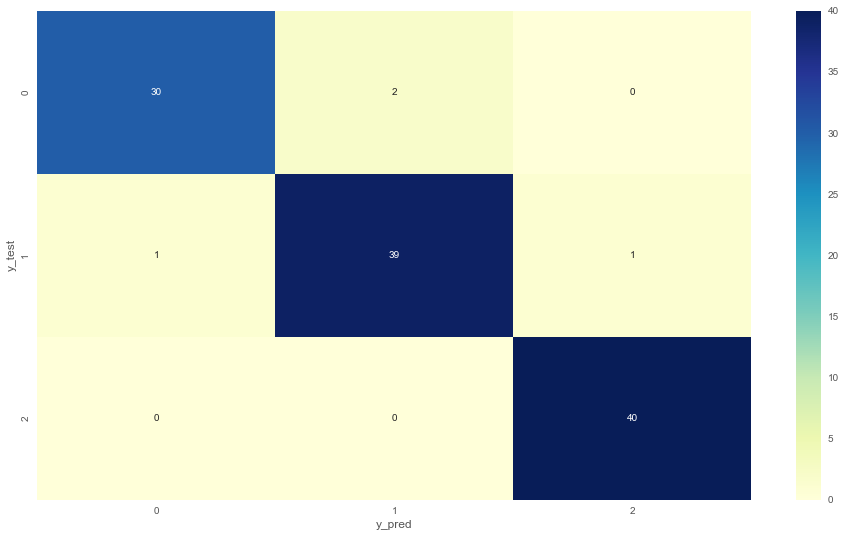



Nombre del modelo: LinearSVC (linear kernel), C = 20
Accuracy: 0.9734513274336283
Tiempo de ejecucion: 0.034


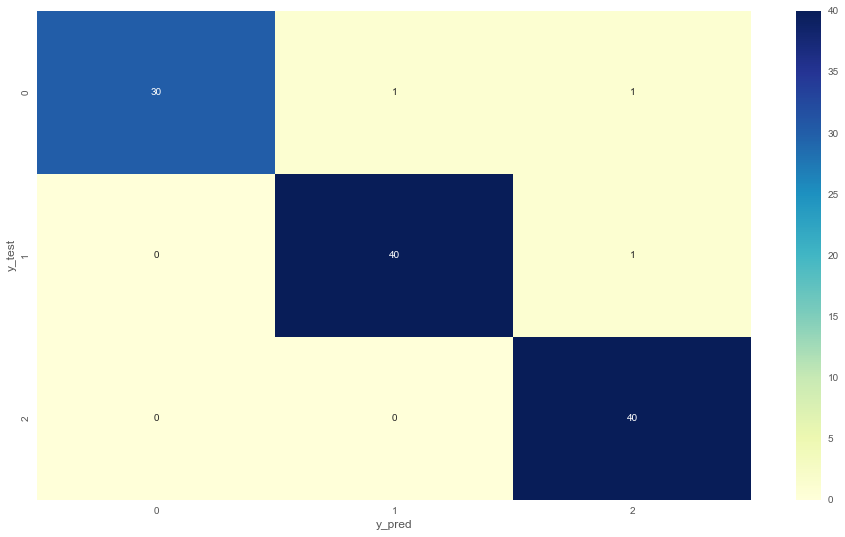



Nombre del modelo: SVC with RBF kernel, g = 0.3, C = 15
Accuracy: 0.9823008849557522
Tiempo de ejecucion: 0.0098


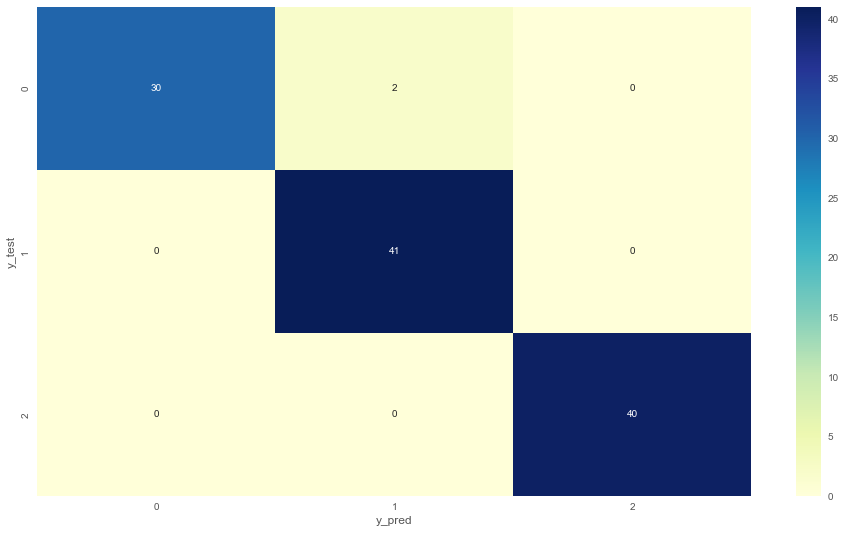



Nombre del modelo: SVC with polynomial (degree 3) kernel, g = 0.8, C = 50, d = 3
Accuracy: 0.9911504424778761
Tiempo de ejecucion: 0.005


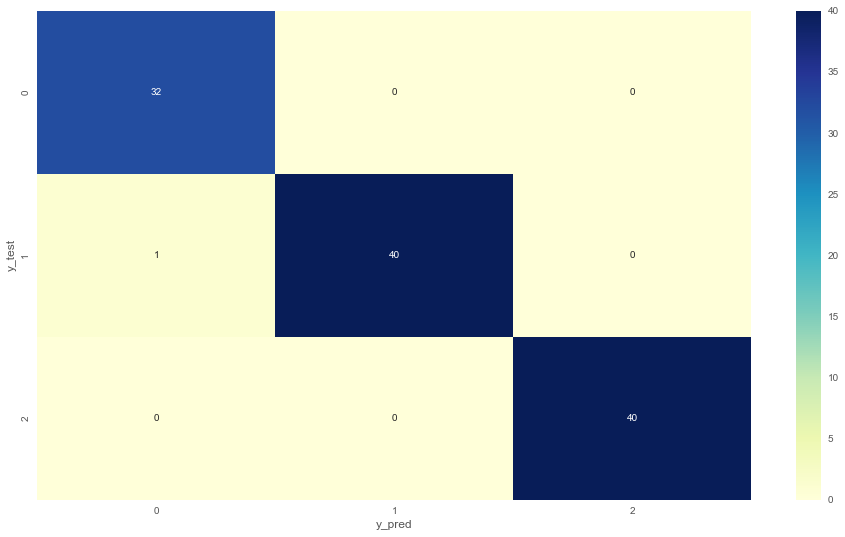



Nombre del modelo: SVC with sigmoid kernel, C = 20
Accuracy: 0.9469026548672567
Tiempo de ejecucion: 0.003


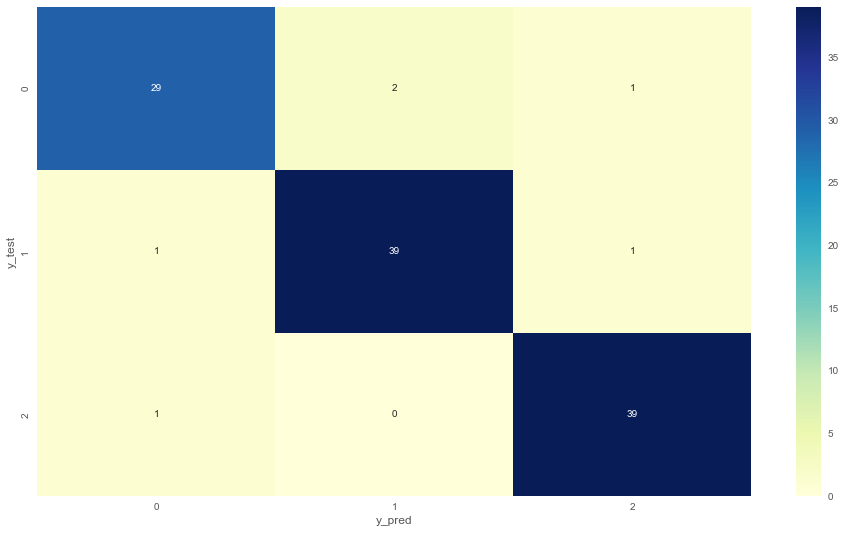



Nombre del modelo: SVC with Gaussian kernel
Accuracy: 0.9646017699115044
Tiempo de ejecucion: 0.0063


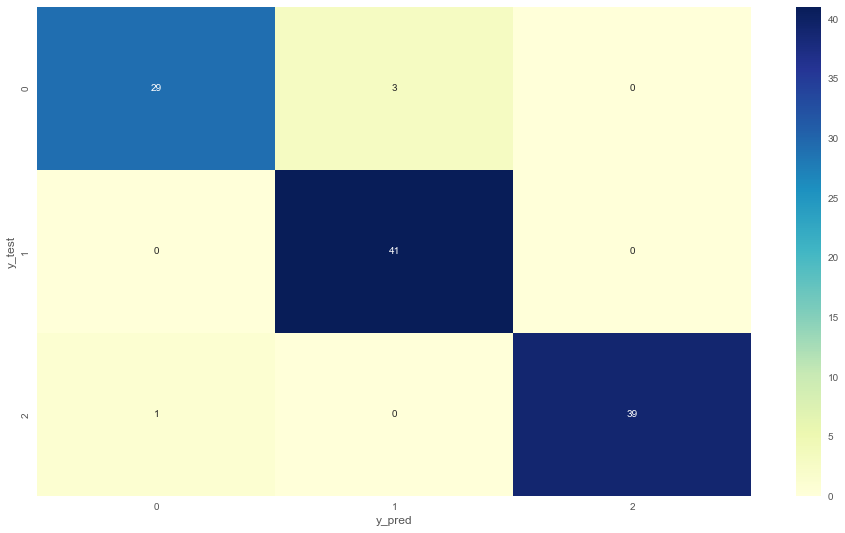

In [78]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

models = (
    svm.SVC(kernel="linear", C=200),
    svm.LinearSVC(C=20, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.3, C=15),
    svm.SVC(kernel="poly", degree=3, gamma=0.8, C=50),
    svm.SVC(kernel="sigmoid", C=50),
    svm.SVC(kernel="rbf")
)

titles = (
    "SVC with linear kernel, C = 200",
    "LinearSVC (linear kernel), C = 20",
    "SVC with RBF kernel, g = 0.3, C = 15",
    "SVC with polynomial (degree 3) kernel, g = 0.8, C = 50, d = 3",
    "SVC with sigmoid kernel, C = 20",
    "SVC with Gaussian kernel"
)

times = []
accuracies = []
errores_l = []

for i in range(0, 6):
    errores = 0
    start = time.time()
    models_r[i].fit(X_train, y_train)
    y_pred = models_r[i].predict(X_test)
    end = time.time()
    puntaje = metrics.accuracy_score(y_test, y_pred)
    print("Nombre del modelo: " + titles[i])
    print("Accuracy:",puntaje)
    print('Tiempo de ejecucion: ' + str(round((end - start), 4)))
    
    times.append(end - start)
    accuracies.append(puntaje)
    
    dat = {
        'y_test': y_test,
        'y_pred': y_pred
    }

    ev = pd.DataFrame(dat, columns=['y_test','y_pred'])

    confusion_matrix = pd.crosstab(ev['y_test'], ev['y_pred'], rownames=['y_test'], colnames=['y_pred'])

    sb.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
    plt.show()
    
    
    matriz = list(Confusion_Matrix(y_true=y_test, y_pred=y_pred))

    for i in range(0, 3):
        for j in range(0, 3):
            if i != j:
                errores += matriz[i][j]
            else:
                continue
    errores_l.append(errores)
    print('\n')

### 7) Comparacion de resultados

In [82]:
d = {'Nombre': list(titles), 'Precision': accuracies, 'Tiempo de ejecucion': times, 'Errores': errores_l}
df = pd.DataFrame(data=d)
pd.options.display.max_colwidth = 100
df

,Nombre,Precision,Tiempo de ejecucion,Errores
0,"SVC with linear kernel, C = 200",0.964602,0.003001,4
1,"LinearSVC (linear kernel), C = 20",0.973451,0.033963,3
2,"SVC with RBF kernel, g = 0.3, C = 15",0.982301,0.009756,2
3,"SVC with polynomial (degree 3) kernel, g = 0.8, C = 50, d = 3",0.991150,0.004996,1
4,"SVC with sigmoid kernel, C = 20",0.946903,0.002999,6
5,SVC with Gaussian kernel,0.964602,0.006284,4


Como se puede ver en la tabla de arriba, todos los modelos obtuvieron un puntaje arriba de 0.95 (excepto por el modelo sigmoidal que obtuvo 6 erorres), indicando que a pesar de sus distintos valores como parametros cualquiera de ellos puede predecir casi con exactitud la calificacion de una casa: si será barata, intermedia o cara. Los errores indican que hubo combinacion de distintas parejas de calificaciones, dando diferentes valores en Falsos-Positivos y Falsos-Negativos.

### 8) Comparacion entre Árbol de Decisión, Random Forest, Naive Bayes y SVM

In [16]:
d2 = {'Algoritmo': ['Arbol de decisión', 'Random forest', 'Naive Bayes', 'SVM Polinomial (Menos errores obtenidos)'], 
      'Precision': [0.957, 1, 0.938, 0.991], 'Tiempo de ejecucion': [0.0137, 0.0107, 0.0515, 0.004996]}
df2 = pd.DataFrame(data=d2)
pd.options.display.max_colwidth = 100
df2

,Algoritmo,Precision,Tiempo de ejecucion
0,Arbol de decisión,0.957,0.013700
1,Random forest,1.000,0.010700
2,Naive Bayes,0.938,0.051500
3,SVM Polinomial (Menos errores obtenidos),0.991,0.004996


- Random Forest fue el algoritmo donde se obtuvo una precisión perfecta pero tiene el segundo mejor tiempo de ejecucion. Mientras que SVM Polinomial tiene el segundo mejor puntaje de precision con el mejor tiempo de ejecucion (0.102004 segundos mas rapido). 

- Naive Bayes fue el que obtuvo el "peor puntaje" de precision junto con el tiempo de ejecucion mas tardado. 

- De esto se puede concluir que los algoritmos de Random Forest y SVM proveen mejores puntajes de precision en los tiempos de ejecucion mas cortos, mientras que Naive Bayes tarda mas dando como resultado puntajes de precision "bajos" (a comparacion de los otros algoritmos porque una precision arriba de 0.90 aun es demasiado bueno).